## Gather

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mb

In [101]:
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')
adverse_reactions = pd.read_csv('adverse_reactions.csv')

## Assess

In [102]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


1. a. Contact has phone number and email together 
b. zipcode should not be a float 
c. zipcode is 4 digits sometimes 
d. state names are abbreviations and full names 
e. address na cannot be fixed

In [103]:
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


2. Lower and upper dose of medication seperated into 2 columns
3. hba1c change has null values- can be replaced by difference between start and end

In [104]:
adverse_reactions.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


4. combine this table with patient table and add the adverse reaction column

In [105]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null object
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        491 non-null float64
country         491 non-null object
contact         491 non-null object
birthdate       503 non-null object
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


5. 12 records have null values in address column

In [106]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
given_name      280 non-null object
surname         280 non-null object
auralin         280 non-null object
novodra         280 non-null object
hba1c_start     280 non-null float64
hba1c_end       280 non-null float64
hba1c_change    171 non-null float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


6. hba1c change is missing but can be calculated 

In [107]:
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
given_name          34 non-null object
surname             34 non-null object
adverse_reaction    34 non-null object
dtypes: object(3)
memory usage: 896.0+ bytes


In [108]:
all_columns = pd.Series(list(patients) + list(treatments) + list(adverse_reactions))
all_columns[all_columns.duplicated()]

14    given_name
15       surname
21    given_name
22       surname
dtype: object

In [109]:
all_columns

0           patient_id
1         assigned_sex
2           given_name
3              surname
4              address
5                 city
6                state
7             zip_code
8              country
9              contact
10           birthdate
11              weight
12              height
13                 bmi
14          given_name
15             surname
16             auralin
17             novodra
18         hba1c_start
19           hba1c_end
20        hba1c_change
21          given_name
22             surname
23    adverse_reaction
dtype: object

In [110]:
list(patients)

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'contact',
 'birthdate',
 'weight',
 'height',
 'bmi']

In [111]:
patients[patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [112]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


7. minimum height of 27 seems unrealistic
8. zipcodes are missing for 12 patients

In [113]:
treatments.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


In [114]:
patients.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
78,79,female,Fauna,Bilodeau,4104 Kennedy Court,Mansfield,MA,2048.0,United States,FaunaBilodeau@teleworm.us1 774 263 5317,7/2/1979,193.4,69,28.6
395,396,male,Krisztián,Bakos,2316 Ingram Road,Yadkinville,NC,27055.0,United States,336-677-8769BakosKrisztian@teleworm.us,3/28/1975,231.9,74,29.8
109,110,male,Stephen,Mayberry,3063 School House Road,Hattiesburg,MS,39402.0,United States,601-699-4153StephenFMayberry@jourrapide.com,9/1/1934,166.1,72,22.5
236,237,female,Fatimah,Kinfe,2640 Sweetwood Drive,Aurora,CO,80010.0,United States,303-360-3627FatimahKinfe@fleckens.hu,1/21/1981,199.8,62,36.5
200,201,male,Kifle,Mustafa,4535 Prospect Street,Pennsauken,NJ,8110.0,United States,856-655-5415KifleMustafa@gustr.com,10/9/1965,186.1,69,27.5


In [115]:
patients.surname.value_counts()

Doe               6
Jakobsen          3
Taylor            3
Kowalczyk         2
Ogochukwu         2
Kadyrov           2
Johnson           2
Batukayev         2
Lâm               2
Grímsdóttir       2
Woźniak           2
Aranda            2
Cabrera           2
Nilsen            2
Schiavone         2
Parker            2
Tạ                2
Dratchev          2
Cindrić           2
Hueber            2
Berg              2
Lương             2
Collins           2
Silva             2
Correia           2
Bùi               2
Liễu              2
Tucker            2
Gersten           2
Souza             2
                 ..
Írisarson         1
Ek                1
Bidwill           1
Nakayama          1
Mehler            1
Mai               1
Rocha             1
Dandonneau        1
Sjöberg           1
Maslov            1
Martinsson        1
Halldórsdóttir    1
Ziegler           1
Sung              1
Yuan              1
Gyenes            1
Ibeamaka          1
Wiśniewska        1
Bakos             1


Jakobsen, Doe and Taylor are duplicated

In [116]:
patients.address.value_counts()

123 Main Street               6
2476 Fulton Street            2
2778 North Avenue             2
648 Old Dear Lane             2
2270 Bel Meadow Drive         1
2397 Bell Street              1
1434 Oak Ridge Drive          1
4640 Windy Ridge Road         1
2168 Butternut Lane           1
4567 Hazelwood Avenue         1
4438 Reeves Street            1
577 Chipmunk Lane             1
2785 Norma Lane               1
685 Duncan Avenue             1
1233 Liberty Avenue           1
1435 Limer Street             1
1624 Rosebud Avenue           1
4237 Hamilton Drive           1
1092 Farm Meadow Drive        1
3073 Bedford Street           1
2691 Kessla Way               1
550 Cliffside Drive           1
1536 John Daniel Drive        1
1257 Elsie Drive              1
3008 Walkers Ridge Way        1
1094 Jones Avenue             1
182 Cross Street              1
2775 Single Street            1
2886 Straford Park            1
2338 Virginia Street          1
                             ..
1589 Roo

9. 8 patients are duplicated

In [117]:
patients[patients.address.duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


10. john doe is duplicated multiple times

In [118]:
patients.weight.sort_values()

210     48.8
459    102.1
335    102.7
74     103.2
317    106.0
171    106.5
51     107.1
270    108.1
198    108.5
48     109.1
478    109.6
141    110.2
38     111.8
438    112.0
14     112.0
235    112.2
307    112.4
191    112.6
408    113.1
49     113.3
326    114.0
338    114.1
253    117.0
321    118.4
168    118.8
1      118.8
350    119.0
207    119.2
265    120.0
341    120.3
       ...  
332    224.0
252    224.2
12     224.2
222    224.8
166    225.3
111    225.9
101    226.2
150    226.6
352    227.7
428    227.7
88     227.7
13     228.4
339    229.0
182    230.3
121    230.8
257    231.7
395    231.9
246    232.1
219    237.8
11     238.7
50     238.9
441    239.1
499    239.6
439    242.0
487    242.4
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 503, dtype: float64

11. weight of 48.8 seems unrealistic for adult- as it is listed in kgs instead of lbs

In [119]:
weight_lbs = patients[patients.surname == 'Zaitseva'].weight * 2.20462
height_in = patients[patients.surname == 'Zaitseva'].height
bmi_check = 703 * weight_lbs / (height_in * height_in)
bmi_check

210    19.055827
dtype: float64

In [120]:
patients[patients.surname == 'Zaitseva'].bmi

210    19.1
Name: bmi, dtype: float64

In [121]:
sum(treatments.auralin.isnull())

0

In [122]:
sum(treatments.novodra.isnull())

0

12. sum is showing not null as null values are replaced by -

#### Quality
##### `patients` table
- Zip code is a float not a string
- Zip code has four digits sometimes
- Tim Neudorf height is 27 in instead of 72 in
- Full state names sometimes, abbreviations other times
- Dsvid Gustafsson
- Missing demographic information (address - contact columns) ***(can't clean)***
- Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns)
- Multiple phone number formats
- Default John Doe data
- Multiple records for Jakobsen, Gersten, Taylor
- kgs instead of lbs for Zaitseva weight

##### `treatments` table
- Missing HbA1c changes
- The letter 'u' in starting and ending doses for Auralin and Novodra
- Lowercase given names and surnames
- Missing records (280 instead of 350)
- Erroneous datatypes (auralin and novodra columns)
- Inaccurate HbA1c changes (leading 4s mistaken as 9s)
- Nulls represented as dashes (-) in auralin and novodra columns

##### `adverse_reactions` table
- Lowercase given names and surnames

#### Tidiness
- Contact column in `patients` table should be split into phone number and email
- Three variables in two columns in `treatments` table (treatment, start dose and end dose)
- Adverse reaction should be part of the `treatments` table
- Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables

## Clean

In [123]:
patients_clean = patients.copy()
treatments_clean = treatments.copy()
adverse_reactions_clean = adverse_reactions.copy()

### Missing Data

<font color='red'>Complete the following two "Missing Data" **Define, Code, and Test** sequences after watching the *"Address Missing Data First"* video.</font>

#### `treatments`: Missing records (280 instead of 350)

##### Define
*Your definition here. Note: the missing `treatments` records are stored in a file named `treatments_cut.csv`, which you can see in this Jupyter Notebook's dashboard (click the **jupyter** logo in the top lefthand corner of this Notebook). Hint: [documentation page](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html) for the function used in the solution.*

##### Code

In [124]:
# Your cleaning code here
treatments_cut=pd.read_csv('treatments_cut.csv')
treatments_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
given_name      70 non-null object
surname         70 non-null object
auralin         70 non-null object
novodra         70 non-null object
hba1c_start     70 non-null float64
hba1c_end       70 non-null float64
hba1c_change    42 non-null float64
dtypes: float64(3), object(4)
memory usage: 3.9+ KB


In [125]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
given_name      280 non-null object
surname         280 non-null object
auralin         280 non-null object
novodra         280 non-null object
hba1c_start     280 non-null float64
hba1c_end       280 non-null float64
hba1c_change    171 non-null float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [126]:
treatments_clean=treatments_clean.append(treatments_cut)

In [127]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 69
Data columns (total 7 columns):
given_name      350 non-null object
surname         350 non-null object
auralin         350 non-null object
novodra         350 non-null object
hba1c_start     350 non-null float64
hba1c_end       350 non-null float64
hba1c_change    213 non-null float64
dtypes: float64(3), object(4)
memory usage: 21.9+ KB


In [128]:
treatments_clean.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [129]:
treatments_clean['hba1c_change']=treatments_clean['hba1c_start']-treatments_clean['hba1c_end']

##### Test

In [130]:
# Your testing code here
treatments_clean.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,0.43
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


#### `treatments`: Missing HbA1c changes and Inaccurate HbA1c changes (leading 4s mistaken as 9s)
*Note: the "Inaccurate HbA1c changes (leading 4s mistaken as 9s)" observation, which is an accuracy issue and not a completeness issue, is included in this header because it is also fixed by the cleaning operation that fixes the missing "Missing HbA1c changes" observation. Multiple observations in one **Define, Code, and Test** header occurs multiple times in this notebook.*

##### Define
zipcode is 4 digits and is a float

##### Code

In [131]:
#Zip code is a float not a string
patients_clean['zip_code']=patients_clean['zip_code'].astype(str).str[:-2]


In [132]:
for i in patients_clean.index:
    if len(patients_clean.zip_code[i]) == 4:
        patients_clean.zip_code[i]= "0" + patients_clean.zip_code[i]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [133]:
patients_clean.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [135]:
#change Neudorf height to 72
patients_clean.at[4,"height"]

27

In [136]:
patients_clean.at[4,"height"]=72

In [137]:
patients_clean.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,72,26.1


In [138]:
patients_clean.state.value_counts()

California    36
TX            32
New York      25
CA            24
NY            22
MA            22
PA            18
GA            15
Illinois      14
OH            14
LA            13
MI            13
Florida       13
OK            13
NJ            12
VA            11
IL            10
WI            10
MS            10
AL             9
MN             9
TN             9
IN             9
FL             9
NC             8
WA             8
KY             8
MO             7
NV             6
KS             6
ID             6
IA             5
CT             5
SC             5
ME             4
RI             4
CO             4
Nebraska       4
ND             4
AR             4
AZ             4
DE             3
SD             3
OR             3
MD             3
WV             3
NE             2
MT             2
DC             2
VT             2
NM             1
AK             1
WY             1
NH             1
Name: state, dtype: int64

In [139]:
#change state names to abbreviation
patients_clean.state.replace({'California':"CA", 'New York': "NY", 'Illinois':"IL",'Florida':"FL","Nebraska":"NE"}, inplace=True)
#test
patients_clean.state.value_counts()

CA    60
NY    47
TX    32
IL    24
MA    22
FL    22
PA    18
GA    15
OH    14
OK    13
LA    13
MI    13
NJ    12
VA    11
WI    10
MS    10
MN     9
IN     9
AL     9
TN     9
KY     8
WA     8
NC     8
MO     7
NE     6
NV     6
ID     6
KS     6
IA     5
SC     5
CT     5
ND     4
RI     4
CO     4
AZ     4
ME     4
AR     4
DE     3
OR     3
MD     3
SD     3
WV     3
MT     2
DC     2
VT     2
NH     1
NM     1
WY     1
AK     1
Name: state, dtype: int64

In [140]:
#replace Dsvid to David
patients_clean.given_name.replace(to_replace="Dsvid", value="David",inplace=True)
#test
patients_clean[patients_clean.given_name=="Dsvid"]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi


### Tidiness

<font color='red'>Complete the following four "Tidiness" **Define, Code, and Test** sequences after watching the *"Cleaning for Tidiness"* video.</font>

#### Contact column in `patients` table contains two variables: phone number and email

##### Define
*Your definition here. Hint 1: use regular expressions with pandas' [`str.extract` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extract.html). Here is an amazing [regex tutorial](https://regexone.com/). Hint 2: [various phone number regex patterns](https://stackoverflow.com/questions/16699007/regular-expression-to-match-standard-10-digit-phone-number). Hint 3: [email address regex pattern](http://emailregex.com/), which you might need to modify to distinguish the email from the phone number.*

##### Code

In [141]:
# Your cleaning code here
patients_clean['Phonenumber']=patients_clean.contact.str.extract('([\(\)\s\d\-]+)',expand= True) 
patients_clean

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,Phonenumber
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6,951-719-9170
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2,1 (217) 569-3204
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8,402-363-6804
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7,1 (732) 636-8246
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,72,26.1,334-515-7487
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,FL,32114,United States,386-334-5237RafaelCardosoCosta@gustr.com,8/31/1931,183.9,70,26.4,386-334-5237
6,7,female,Mary,Adams,3145 Sheila Lane,Burbank,NV,84728,United States,775-533-5933MaryBAdams@einrot.com,11/19/1969,146.3,65,24.3,775-533-5933
7,8,female,Xiuxiu,Chang,2687 Black Oak Hollow Road,Morgan Hill,CA,95037,United States,XiuxiuChang@einrot.com1 408 778 3236,8/13/1958,158.0,60,30.9,1 408 778 3236
8,9,male,David,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,816-265-9578DavidGustafsson@armyspy.com,3/6/1937,163.9,66,26.5,816-265-9578
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,NY,10011,United States,SophieCabreraIbarra@teleworm.us1 718 795 9124,12/3/1930,194.7,64,33.4,1 718 795 9124


In [142]:
patients_clean['Email']=patients_clean.contact.str.extract('([a-zA-Z]+@[a-zA-Z]+\.[a-zA-Z]+)',expand= True)
patients_clean=patients_clean.drop('contact', axis=1)
patients_clean.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,Phonenumber,Email
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,7/10/1976,121.7,66,19.6,951-719-9170,ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812,United States,4/3/1967,118.8,66,19.2,1 (217) 569-3204,PamelaSHill@cuvox.de
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467,United States,2/19/1980,177.8,71,24.8,402-363-6804,JaeMDebord@gustr.com
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,7/26/1951,220.9,70,31.7,1 (732) 636-8246,PhanBaLiem@jourrapide.com
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,2/18/1928,192.3,72,26.1,334-515-7487,TimNeudorf@cuvox.de


#### Three variables in two columns in `treatments` table (treatment, start dose and end dose)

##### Define
*Your definition here. Hint: use pandas' [melt function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) and [`str.split()` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html). Here is an excellent [`melt` tutorial](https://deparkes.co.uk/2016/10/28/reshape-pandas-data-with-melt/).*

##### Code

In [143]:
treatments_clean.head()


,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,0.43
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [144]:
treatments_clean.auralin.replace(to_replace="-",value="",inplace=True)
treatments_clean.novodra.replace(to_replace="-",value="",inplace=True)

In [145]:
treatments_clean.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,,7.63,7.20,0.43
1,elliot,richardson,,40u - 45u,7.56,7.09,0.47
2,yukitaka,takenaka,,39u - 36u,7.68,7.25,0.43
3,skye,gormanston,33u - 36u,,7.97,7.62,0.35
4,alissa,montez,,33u - 29u,7.78,7.46,0.32


In [146]:
treatments_clean=pd.melt(treatments_clean, id_vars=['given_name','surname','hba1c_start','hba1c_end','hba1c_change'], value_vars=['auralin', 'novodra'], var_name='medication', value_name='dose' )


In [147]:
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medication,dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
1,elliot,richardson,7.56,7.09,0.47,auralin,
2,yukitaka,takenaka,7.68,7.25,0.43,auralin,
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
4,alissa,montez,7.78,7.46,0.32,auralin,


In [148]:
treatments_clean=treatments_clean[treatments_clean.dose!=""]

In [149]:
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medication,dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u - 36u


In [150]:
treatments_clean[['start','end']] = treatments_clean.dose.str.split("\-",expand=True)


In [151]:
# Your cleaning code here
treatments_clean.drop('dose', axis=1)
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medication,dose,start,end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u - 36u,30u,36u


#### Adverse reaction should be part of the `treatments` table

##### Define
*Your definition here. Hint: [tutorial](https://chrisalbon.com/python/pandas_join_merge_dataframe.html) for the function used in the solution.*

##### Code

In [152]:
adverse_reactions_clean.info(), treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
given_name          34 non-null object
surname             34 non-null object
adverse_reaction    34 non-null object
dtypes: object(3)
memory usage: 896.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 698
Data columns (total 9 columns):
given_name      350 non-null object
surname         350 non-null object
hba1c_start     350 non-null float64
hba1c_end       350 non-null float64
hba1c_change    350 non-null float64
medication      350 non-null object
dose            350 non-null object
start           350 non-null object
end             350 non-null object
dtypes: float64(3), object(6)
memory usage: 27.3+ KB


(None, None)

In [153]:
treatments_clean = pd.merge(treatments_clean, adverse_reactions_clean, how="outer", on=["given_name", "surname"])
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 10 columns):
given_name          350 non-null object
surname             350 non-null object
hba1c_start         350 non-null float64
hba1c_end           350 non-null float64
hba1c_change        350 non-null float64
medication          350 non-null object
dose                350 non-null object
start               350 non-null object
end                 350 non-null object
adverse_reaction    35 non-null object
dtypes: float64(3), object(7)
memory usage: 30.1+ KB


#### Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables  and Lowercase given names and surnames

##### Define
*Your definition here. Hint: [tutorial](https://chrisalbon.com/python/pandas_join_merge_dataframe.html) for one function used in the solution and [tutorial](http://erikrood.com/Python_References/dropping_rows_cols_pandas.html) for another function used in the solution.*

##### Code

In [154]:
# Your cleaning code here
treatments_clean.surname=treatments_clean.surname.str.lower()
treatments_clean.given_name=treatments_clean.given_name.str.lower()
treatments_clean[treatments_clean.duplicated()]

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medication,dose,start,end,adverse_reaction
6,joseph,day,7.7,7.19,0.51,auralin,29u - 36u,29u,36u,hypoglycemia


##### Test

In [155]:
#drop duplicates
treatments_clean.drop_duplicates(inplace=True)

In [156]:
# Your testing code here
treatments_clean[treatments_clean.duplicated()]

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medication,dose,start,end,adverse_reaction


### Quality

<font color='red'>Complete the remaining "Quality" **Define, Code, and Test** sequences after watching the *"Cleaning for Quality"* video.</font>

#### Zip code is a float not a string and Zip code has four digits sometimes

##### Define
*Your definition here. Hint: see the "Data Cleaning Process" page.*

##### Code

In [157]:
# Your cleaning code here-- completed earlier

##### Test

In [158]:
# Your testing code here

#### Tim Neudorf height is 27 in instead of 72 in

##### Define
*Your definition here.*

##### Code

In [159]:
# Your cleaning code here

##### Test

In [160]:
# Your testing code here

#### Full state names sometimes, abbreviations other times

##### Define
*Your definition here. Hint: [tutorial](https://chrisalbon.com/python/pandas_apply_operations_to_dataframes.html) for method used in solution.*

##### Code

In [161]:
# Your cleaning code here

##### Test

In [162]:
# Your testing code here

#### Dsvid Gustafsson

##### Define
*Your definition here.*

##### Code

In [163]:
# Your cleaning code here

##### Test

In [164]:
# Your testing code here

#### Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns) and Erroneous datatypes (auralin and novodra columns) and The letter 'u' in starting and ending doses for Auralin and Novodra

##### Define
*Your definition here. Hint: [documentation page](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) for one method used in solution, [documentation page](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html) for one function used in the solution, and [documentation page](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.strip.html) for another method used in the solution.*

##### Code

In [165]:
# Your cleaning code here

##### Test

In [166]:
# Your testing code here

#### Multiple phone number formats

##### Define
*Your definition here. Hint: helpful [Stack Overflow answer](https://stackoverflow.com/a/123681).*

In [167]:
patients_clean.Phonenumber.value_counts()

1234567890          6
-                   2
402-848-4923        2
304-438-2648        2
1 (845) 858-7707    2
330-365-4059        1
1 615 755 8235      1
803-712-1180        1
985-253-7891        1
617-317-5055        1
1 661 779 6795      1
1 (817) 909-5667    1
618-261-9896        1
1 (605) 440-5492    1
701-235-3404        1
1 405 449 7960      1
661-291-1812        1
718-628-9500        1
740-552-2444        1
717-368-8321        1
508-804-4850        1
217-421-0935        1
303-360-3627        1
1 217 491 5261      1
508-821-2421        1
479-248-5663        1
1 404 547 4508      1
1 608 277 0146      1
352-362-5392        1
859-297-3368        1
                   ..
818-372-7106        1
765-379-3885        1
260-591-5755        1
989-822-1351        1
646-982-6609        1
1 (212) 782-4151    1
256-872-9211        1
1 (702) 438-5138    1
302-397-6035        1
1 (803) 465-3312    1
218-773-9682        1
1 813 434 8122      1
406-775-2696        1
1 508 921 6327      1
1 (916) 45

##### Code

In [168]:
# Your cleaning code here
patients_clean['Phonenumber']=patients_clean['Phonenumber'].astype(str)


In [169]:
patients_clean['Phonenumber'].replace('\D+', '', regex=True, inplace=True )


In [170]:
patients_clean['Phonenumber']

0       9517199170
1      12175693204
2       4023636804
3      17326368246
4       3345157487
5       3863345237
6       7755335933
7      14087783236
8       8162659578
9      17187959124
10      9064788949
11                
12      4345092614
13     12054178095
14      9187123469
15      2762251955
16     15597657836
17      6788298578
18      4067752696
19     15305328397
20     17814471763
21      9734455341
22      9147456108
23     18133559476
24     18458587707
25      5058284955
26      3096718852
27      9858147603
28     12678957462
29     18458587707
          ...     
473    15089052371
474     6782633564
475     6509627179
476     2679723749
477    18432126421
478    14157556435
479    19094582515
480    12103265509
481    19187062776
482     3616934960
483     7315770292
484     3366972005
485    18506590417
486     2546814504
487    17852291188
488     3524534601
489     9252835425
490     9146369304
491     2102228684
492     7144962264
493    12083881065
494    15867

##### Test

In [171]:
for i in patients_clean.index:
    if len(patients_clean.Phonenumber[i]) == 10:
        patients_clean.Phonenumber[i]= "1" + patients_clean.Phonenumber[i]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [172]:
patients_clean.Phonenumber=patients_clean.Phonenumber.str[1:11]

In [173]:
patients_clean.Phonenumber

0      9517199170
1      2175693204
2      4023636804
3      7326368246
4      3345157487
5      3863345237
6      7755335933
7      4087783236
8      8162659578
9      7187959124
10     9064788949
11               
12     4345092614
13     2054178095
14     9187123469
15     2762251955
16     5597657836
17     6788298578
18     4067752696
19     5305328397
20     7814471763
21     9734455341
22     9147456108
23     8133559476
24     8458587707
25     5058284955
26     3096718852
27     9858147603
28     2678957462
29     8458587707
          ...    
473    5089052371
474    6782633564
475    6509627179
476    2679723749
477    8432126421
478    4157556435
479    9094582515
480    2103265509
481    9187062776
482    3616934960
483    7315770292
484    3366972005
485    8506590417
486    2546814504
487    7852291188
488    3524534601
489    9252835425
490    9146369304
491    2102228684
492    7144962264
493    2083881065
494    5867900975
495    6505704896
496    2097622320
497    918

In [174]:
# Your testing code here
patients_clean[patients_clean.surname=="Doe"]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,Phonenumber,Email
215,216,male,John,Doe,123 Main Street,New York,NY,12345,United States,1/1/1975,180.0,72,24.4,1234567890,johndoe@email.com
229,230,male,John,Doe,123 Main Street,New York,NY,12345,United States,1/1/1975,180.0,72,24.4,1234567890,johndoe@email.com
237,238,male,John,Doe,123 Main Street,New York,NY,12345,United States,1/1/1975,180.0,72,24.4,1234567890,johndoe@email.com
244,245,male,John,Doe,123 Main Street,New York,NY,12345,United States,1/1/1975,180.0,72,24.4,1234567890,johndoe@email.com
251,252,male,John,Doe,123 Main Street,New York,NY,12345,United States,1/1/1975,180.0,72,24.4,1234567890,johndoe@email.com
277,278,male,John,Doe,123 Main Street,New York,NY,12345,United States,1/1/1975,180.0,72,24.4,1234567890,johndoe@email.com


#### Default John Doe data

##### Define
*Your definition here. Recall that it is assumed that the data that this John Doe data displaced is not recoverable.*

##### Code

In [175]:
# Your cleaning code here
patients_clean=patients_clean[patients_clean.surname!="Doe"]

In [176]:
#test code
patients_clean[patients_clean.surname=="Doe"]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,Phonenumber,Email


##### #### Multiple records for Jakobsen, Gersten, Taylor

In [177]:
# Your testing code here
patients_clean[patients_clean.surname=="Jakobsen"]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,Phonenumber,Email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,8/1/1985,155.8,67,24.4,8458587707,JakobCJakobsen@einrot.com
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,8/1/1985,155.8,67,24.4,8458587707,JakobCJakobsen@einrot.com
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,11/25/1962,185.2,67,29.0,9792030438,KarenJakobsen@jourrapide.com


In [178]:
# cleaning code here
patients_clean=patients_clean[patients_clean.index!=29]

In [179]:
#test code
patients_clean[patients_clean.surname=="Jakobsen"]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,Phonenumber,Email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,8/1/1985,155.8,67,24.4,8458587707,JakobCJakobsen@einrot.com
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,11/25/1962,185.2,67,29.0,9792030438,KarenJakobsen@jourrapide.com


In [180]:
patients_clean[patients_clean.surname=="Gersten"]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,Phonenumber,Email
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,5/3/1954,138.2,71,19.3,4028484923,PatrickGersten@rhyta.com
502,503,male,Pat,Gersten,2778 North Avenue,Burr,NE,68324,United States,5/3/1954,138.2,71,19.3,4028484923,PatrickGersten@rhyta.com


In [181]:
#cleaning code here

patients_clean=patients_clean[patients_clean.index!=502]

In [182]:
#test code
patients_clean[patients_clean.surname=="Gersten"]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,Phonenumber,Email
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,5/3/1954,138.2,71,19.3,4028484923,PatrickGersten@rhyta.com


In [183]:
patients_clean[patients_clean.surname=="Taylor"]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,Phonenumber,Email
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,10/23/1960,206.1,64,35.4,3044382648,SandraCTaylor@dayrep.com
282,283,female,Sandy,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,10/23/1960,206.1,64,35.4,3044382648,SandraCTaylor@dayrep.com
426,427,male,Rogelio,Taylor,4064 Marigold Lane,Miami,FL,33179,United States,9/2/1992,186.6,69,27.6,3054346299,RogelioJTaylor@teleworm.us


In [184]:
# cleaning code here

patients_clean=patients_clean[patients_clean.index!=282]

In [185]:
#test code
patients_clean[patients_clean.surname=="Taylor"]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,Phonenumber,Email
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,10/23/1960,206.1,64,35.4,3044382648,SandraCTaylor@dayrep.com
426,427,male,Rogelio,Taylor,4064 Marigold Lane,Miami,FL,33179,United States,9/2/1992,186.6,69,27.6,3054346299,RogelioJTaylor@teleworm.us


##### kgs instead of lbs for Zaitseva weight

In [186]:
#### kgs instead of lbs for Zaitseva weight
patients_clean[patients_clean.surname == 'Zaitseva'].weight

210    48.8
Name: weight, dtype: float64

In [187]:
#code to change weight to lbs
patients_clean.at[210,'weight']=patients_clean.at[210,'weight'] * 2.205

In [188]:
#test
patients_clean[patients_clean.surname == 'Zaitseva'].weight

210    107.604
Name: weight, dtype: float64

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,Phonenumber,Email
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,2/18/1928,192.3,72,26.1,3345157487,TimNeudorf@cuvox.de


In [195]:
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,medication,dose,start,end,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u,41u,48u,NaN
1,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u,33u,36u,NaN
2,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u,37u,42u,NaN
3,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u,31u,38u,NaN
4,asia,woźniak,7.76,7.37,0.39,auralin,30u - 36u,30u,36u,NaN


In [213]:
adverse_rx=treatments_clean.groupby(['medication','adverse_reaction']).agg({'adverse_reaction':'count'})
adverse_rx

adverse_reaction
medication adverse_reaction                           
auralin    cough                                     1
           headache                                  1
           hypoglycemia                              9
           nausea                                    1
           throat irritation                         2
novodra    cough                                     1
           headache                                  2
           hypoglycemia                             10
           injection site discomfort                 6
           nausea                                    1

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd895cb7ba8>], dtype=object)

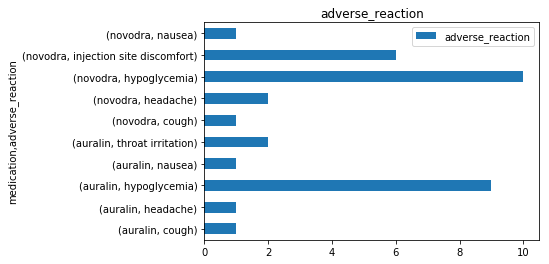

In [226]:
adverse_rx.plot(kind="barh", subplots='True')